In [1]:
import numpy as np

from tqdm.auto import tqdm

import matplotlib
import matplotlib.pyplot as plt
import networkx as nx

import matilda
import matilda.prototyping
import matilda.harmonic


In [2]:
SAVEFIG = False


## Example 1
in Fig.1 https://arxiv.org/abs/2105.15170

In [3]:
simplices = [[0], [1], [2], [0, 1], [0, 2], [1, 2], [3], [0, 1, 2], [0, 3], [2, 3]]

coord_vertices = [[1, 0], [1 / 2, 1], [0, 0], [1 / 2, -1]]

simplices = [np.array(s) for s in simplices]


K = matilda.prototyping.FilteredSimplicialComplex(
    dimension=2,
    simplices=simplices,
    simplices_indices=[i for i in range(len(simplices))],
    appears_at=[0, 1, 2, 3, 3, 3, 4, 5, 6, 6],
)


![simplex](img/essential.png)

<Axes: >

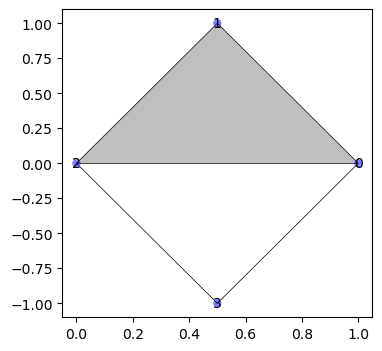

In [4]:
plotter = matilda.plot.Plotter()

fig, ax = plt.subplots(ncols=1, figsize=(4, 4))

plotter.plot_2skel(
    K,
    max_id=99,
    pos={i: p for i, p in enumerate(coord_vertices)},
    labels=[str(i[0]) for i in simplices if len(i) == 1],
    this_ax=ax,
)


In [5]:
homology_computer = matilda.PersistentHomologyComputer()

homology_computer.compute_persistent_homology(K, with_representatives=True, modulus=0)


In [6]:
homology_computer.boundary_matrix


{3: {0: -1.0, 1: 1.0},
 4: {0: -1.0, 2: 1.0},
 5: {1: -1.0, 2: 1.0},
 7: {3: 1.0, 4: -1.0, 5: 1.0},
 8: {0: -1.0, 6: 1.0},
 9: {2: -1.0, 6: 1.0}}

In [7]:
for k, v in homology_computer.bars.items():
    if k > 1:
        break
    print("Bars of dimension {}".format(k))
    for kk, vv in v.items():
        print("{}:{}".format(kk, vv))


Bars of dimension 0
0:[0.0, inf]
1:[1.0, 3.0]
2:[2.0, 3.0]
6:[4.0, 6.0]
Bars of dimension 1
5:[3.0, 5.0]
9:[6.0, inf]


In [8]:
homology_computer.persistent_cycles[1]


{5: {3: 1, 4: -1, 5: 1}, 9: {4: 1, 8: -1, 9: 1}}

In [9]:
harmonic_computer = matilda.harmonic.HarmonicRepresentativesComputer(
    K, homology_computer
)
harmonic_computer.compute_harmonic_cycles(dim=1, verbose=3)


no cycles selected, projecting all 2 1-dimensional cycles
computing harmonic representatives in dimension 1
there are 2 homology classes


  0%|          | 0/2 [00:00<?, ?it/s]


current cycle 5
creating 3x0 boundary matrix
the orthonormalized boundary matrix has shape (3, 0)
0.000s
projecting on the boundary...
0.000s
projecting on the other harmonic cycles...
0.000s

current cycle 9
creating 5x1 boundary matrix
adding (5, 1) vectors to the basis (5, 0)
using gram-smith
the orthonormalized boundary matrix has shape (5, 1)
0.091s
projecting on the boundary...
projecting cycle of shape (5,) onto the orthogonal of the boundary (5, 1)
0.000s
projecting on the other harmonic cycles...
0.000s


In [10]:
for id in harmonic_computer.harmonic_cycles[1].keys():
    print(
        "ID: {} standard {:.2f}, harmonic {:.2f}".format(
            id,
            np.linalg.norm(
                [i for _, i in homology_computer.persistent_cycles[1][id].items()]
            ),
            np.linalg.norm(
                [i for _, i in harmonic_computer.harmonic_cycles[1][id].items()]
            ),
        )
    )


ID: 5 standard 1.73, harmonic 1.73
ID: 9 standard 1.73, harmonic 1.63


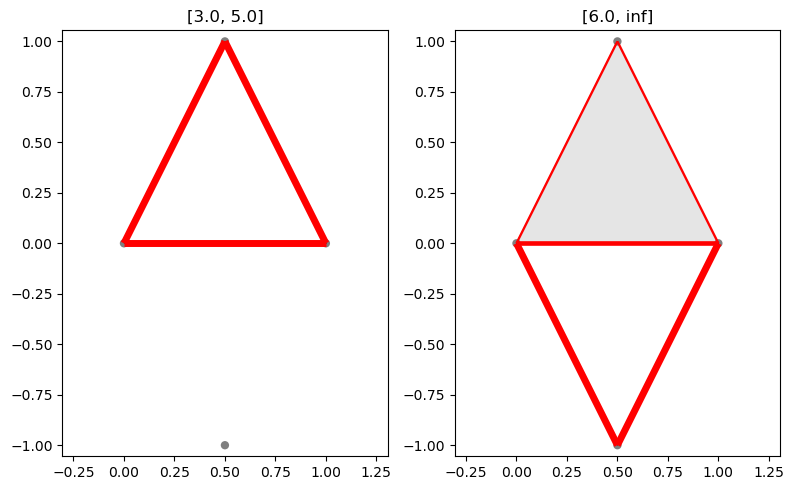

In [11]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 5))

for i, id in enumerate(harmonic_computer.harmonic_cycles[1].keys()):
    plotter.plot_2skel(
        K,
        max_id=id,
        pos={i: p for i, p in enumerate(coord_vertices)},
        vertices_color=["black"],
        t_alpha=0.2,
        this_ax=axs[i],
    )

    lines_0, w_0 = plotter.plot_1cycle(
        harmonic_computer.harmonic_cycles[1][id], K, coord_vertices
    )

    lg0 = matplotlib.collections.LineCollection(
        lines_0, color="red", linewidths=w_0 * 5
    )
    axs[i].add_collection(lg0)

    axs[i].axis("equal")
    axs[i].set_title(homology_computer.bars[1][id])

plt.tight_layout()
if SAVEFIG:
    plt.savefig("{}_points_matilda.pdf".format(len(pointcloud)))
plt.show()
